In [1]:
using Gadfly, StatsBase
include("rpc.jl")

getauthors! (generic function with 1 method)

In [15]:
ipc = connect("/home/keorn/.local/share/io.parity.ethereum/jsonrpc.ipc")

LoadError: connect: no such file or directory (ENOENT)

In [2]:
ipc = connect("/tmp/parity/jsonrpc.ipc")

Base.PipeEndpoint(open, 0 bytes waiting)

In [14]:
movingaverage(v::Vector, n::Int) = [mean(v[i-n+1:i]) for i in n:length(v)]
plotshare(blocks::Vector, smooth::Int) = plot(
x=[Dates.unix2datetime(b["timestamp"]) for b in blocks[smooth:end]],
y=movingaverage([b["client"]=="parity" for b in blocks], smooth),
Coord.Cartesian(xmin=Dates.unix2datetime(blocks[smooth]["timestamp"]), xmax=Dates.unix2datetime(blocks[end]["timestamp"])),
Theme(background_color=colorant"white"),
Guide.xlabel("Time"),
Guide.ylabel("Mining share"),
Geom.line)

LoadError: UndefVarError: @colorant_str not defined

In [17]:
bcs = latestblocks(ipc, 5000, false, 1)
markour!(bcs)
getauthors!(bcs)

LoadError: UndefVarError: latestblocks not defined

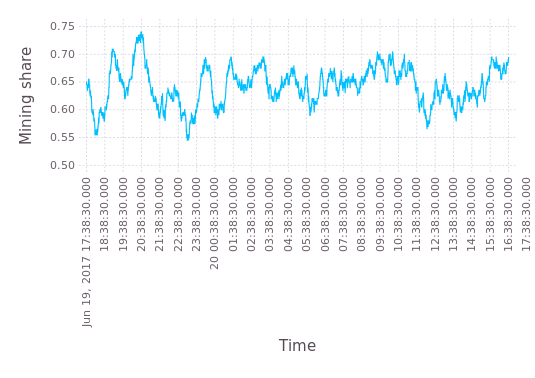

In [7]:
p = plotshare(bcs, 200)

In [6]:
draw(PNG("mining_share.png", 20cm, 15cm), p)

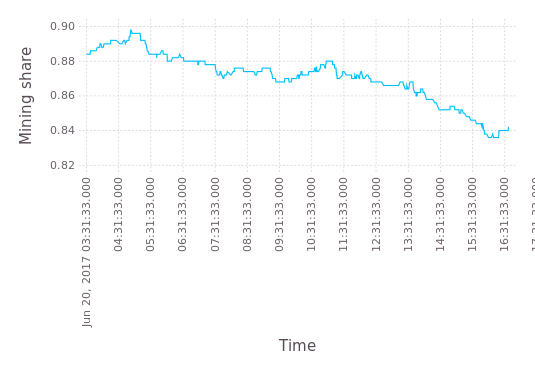

In [8]:
miner = "ethermine"
miner_bcs = [b for b in bcs if b["author"] == miner]
plotshare(miner_bcs, 500)

In [24]:
sort(collect(proportionmap([b["author"] for b in bcs[end-15:end]])), by=x->x[2])

1-element Array{Pair{String,Float64},1}:
 "0x006be5a7f99187ce9494baeb0184b1448e3ae592"=>1.0

In [6]:
authors = unique([b["author"] for b in bcs])
shares = Dict()
for author in authors
    blocks = filter(b->b["author"]==author, bcs)
    shares[author] = length(filter(b->b["client"]=="parity", blocks))/length(blocks)
end
shares = sort(collect(shares), by=x->x[2]);

In [7]:
for s in shares
    println(s[1], " mines ", round(Int, s[2]*100), "% blocks with Parity.")
end

0x00427feae2419c15b89d1c21af10d1b6650a4d3d mines 0% blocks with Parity.
0x4ed9b08e6354c70fe6f8cb0411b0d3246b424d6c mines 0% blocks with Parity.
0x00e4a10650e5a6d6001c38ff8e64f97016a1645c mines 0% blocks with Parity.
0x00a0a24b9f0e5ec7aa4c7389b8302fd0123194de mines 0% blocks with Parity.
0x0020ee4be0e2027d76603cb751ee069519ba81a1 mines 0% blocks with Parity.
0x0010f94b296a852aaac52ea6c5ac72e03afd032d mines 0% blocks with Parity.
0x007733a1fe69cf3f2cf989f81c7b4cac1693387a mines 0% blocks with Parity.
0x00d6cc1ba9cf89bd2e58009741f4f7325badc0ed mines 0% blocks with Parity.


In [56]:
times = 1000
mean([bcs[end-times+t]["timestamp"] - bcs[end-times+t-1]["timestamp"] for t in 1:times])

71.703

In [30]:
rpc(ipc, "eth_syncing")

LoadError: MethodError: no method matching decode(::Bool)[0m
Closest candidates are:
  decode([1m[31m::Int64[0m) at /home/keorn/documents/RPC.jl/rpc.jl:26
  decode([1m[31m::String[0m) at /home/keorn/documents/RPC.jl/rpc.jl:25
  decode([1m[31m::Void[0m) at /home/keorn/documents/RPC.jl/rpc.jl:24
  ...[0m

In [19]:
rpc(ipc, "parity_netPeers")["peers"]

46-element Array{Any,1}:
 Dict{String,Any}(Pair{String,Any}("name",""),Pair{String,Any}("protocols",Dict("pip"=>Empty,"eth"=>Empty)),Pair{String,Any}("network",Dict("localAddress"=>"127.0.0.1:41608","remoteAddress"=>"Handshake")),Pair{String,Any}("id","dc1951651fe6d3f8ef05a280ae0e0a6ca1868d09e13016c74dd44aa71b681c5d50850f0b4eb2a3e016613c5e7ffeef75eccae88e117abecd902168567b0ee973"),Pair{String,Any}("caps",Any[]))     
 Dict{String,Any}(Pair{String,Any}("name",""),Pair{String,Any}("protocols",Dict("pip"=>Empty,"eth"=>Empty)),Pair{String,Any}("network",Dict("localAddress"=>"192.168.10.240:59850","remoteAddress"=>"Handshake")),Pair{String,Any}("id","06357319ab28ead03f570034ccb12303a520d5ce0972db36015ecc16c943dfced4b1523d16383db4f966e4b637e3103880900b764ff70d61d1e34e32ce538003"),Pair{String,Any}("caps",Any[]))
 Dict{String,Any}(Pair{String,Any}("name",""),Pair{String,Any}("protocols",Dict("pip"=>Empty,"eth"=>Empty)),Pair{String,Any}("network",Dict("localAddress"=>"192.168.10.240:55862","rem

In [ ]:
enode://06357319ab28ead03f570034ccb12303a520d5ce0972db36015ecc16c943dfced4b1523d16383db4f966e4b637e3103880900b764ff70d61d1e34e32ce538003@192.168.178.95:30303

In [61]:
rpc(ipc, "eth_getTransactionReceipt", "0x5a1bf2d6bbfcb2526a4686cc409bd713f81811ce037b79171870fc466108132b")

Empty

In [39]:
rpc(ipc, "eth_call", Dict("from"=>"0x0092bebe0ea0a47cCca053773564d92622FeDDC2", "to"=>"0x9d3924fed78706dfb558222119bb6e706430ec68",
"data"=>"0xddca3f43"))

"0x"

In [8]:
bcs = latestblocks(ipc, 105);

In [27]:
filter(b->b["number"] == 2481744, bcs)[1]["sealFields"][1]

"8416574b70"

In [28]:
hex(2481744)

"25de50"

In [10]:
rpc(ipc, "eth_getBlockByNumber", encode(29649), false)["author"]

LoadError: MethodError: Cannot `convert` an object of type String to an object of type Empty
This may have arisen from a call to the constructor Empty(...),
since type constructors fall back to convert methods.

In [26]:
countmap([b["author"] for b in bcs])

Dict{String,Int64} with 2 entries:
  "0x006be5a7f99187ce9494baeb0184b1448e3ae592" => 1
  "0xde093a03ab9de64f7e629d82241ea87e327db756" => 9

In [21]:
rpc(ipc, "eth_getBlockByNumber", encode(1127), true)["transactions"][1]

Dict{String,Any} with 20 entries:
  "gasPrice"         => 8470399590
  "networkId"        => Empty
  "r"                => "0xc0aa7fd221ffa497e00bebebe83e7267a32c014b958c4e2a3658…
  "blockNumber"      => 1127
  "standardV"        => 1
  "value"            => 0
  "gas"              => 940000
  "s"                => "0x175aa0e8e51ef468134b0603118b28d6f80071cd81b122c259b6…
  "v"                => 28
  "publicKey"        => "0xfc26ada42e2f9937dfd83967f9c8345c71372daf323281084afc…
  "raw"              => "0xf929bd808501f8e00a66830e57e08080b9296a60606040523360…
  "hash"             => "0x9c23c688918a678cd4a168c2945b87ab9098c7f40c1e01fa1d4a…
  "creates"          => "0xb17fafac2d2a110b5d34ae9ca9c435a8d990587f"
  "transactionIndex" => 0
  "condition"        => Empty
  "input"            => "0x606060405233600060006101000a81548173ffffffffffffffff…
  "blockHash"        => "0x452ff569ed68536d53020d14f6705bae17f1bb3d666cd5f374e3…
  "to"               => Empty
  "from"             => "0x0092bebe0ea0a

In [66]:
rpc(ipc, "personal_sendTransaction", Dict(
"from"=>"0x0092bebe0ea0a47cCca053773564d92622FeDDC2",
"gas"=>"0x2bda3c",
"gasPrice"=>"0x50000",
"data"=>"0x606060405233600060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550670de0b6b3a764000060035534610000575b612904806100666000396000f3006060604052361561013c576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306b2ff471461014157806313af40351461018c57806319362a28146101bf5780633f3935d114610248578063432ced04146102b75780634f39ca59146102eb5780636795dbcd1461032457806369fe0e2d146103c857806379ce9fac146103fd5780638da5cb5b1461045557806390b97fc1146104a457806392698814146105245780639890220b1461055d578063ac4e73f914610584578063ac72c12014610612578063c3a358251461064b578063ddca3f43146106c3578063deb931a2146106e6578063df57b74214610747578063e30bd740146107a8578063eadf976014610862578063ef5454d6146108e7578063f25eb5c114610975578063f6d339e414610984575b610000565b3461000057610172600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610a1f565b604051808215151515815260200191505060405180910390f35b34610000576101bd600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610a81565b005b346100005761022e60048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803560001916906020019091905050610ba2565b604051808215151515815260200191505060405180910390f35b346100005761029d600480803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610dc9565b604051808215151515815260200191505060405180910390f35b6102d1600480803560001916906020019091905050611035565b604051808215151515815260200191505060405180910390f35b346100005761030a60048080356000191690602001909190505061115f565b604051808215151515815260200191505060405180910390f35b346100005761038660048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611378565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34610000576103e3600480803590602001909190505061140d565b604051808215151515815260200191505060405180910390f35b346100005761043b60048080356000191690602001909190803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506114b4565b604051808215151515815260200191505060405180910390f35b34610000576104626115fb565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b346100005761050660048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611621565b60405180826000191660001916815260200191505060405180910390f35b34610000576105436004808035600019169060200190919050506116b2565b604051808215151515815260200191505060405180910390f35b346100005761056a611715565b604051808215151515815260200191505060405180910390f35b34610000576105f8600480803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050611824565b604051808215151515815260200191505060405180910390f35b3461000057610631600480803560001916906020019091905050611d8b565b604051808215151515815260200191505060405180910390f35b34610000576106ad60048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611dee565b6040518082815260200191505060405180910390f35b34610000576106d0611e83565b6040518082815260200191505060405180910390f35b3461000057610705600480803560001916906020019091905050611e89565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3461000057610766600480803560001916906020019091905050611ed2565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34610000576107d9600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050611f1b565b6040518080602001828103825283818151815260200191508051906020019080838360008314610828575b80518252602083111561082857602082019150602081019050602083039250610804565b505050905090810190601f1680156108545780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34610000576108cd60048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803590602001909190505061200c565b604051808215151515815260200191505060405180910390f35b346100005761095b600480803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050612236565b604051808215151515815260200191505060405180910390f35b3461000057610982612425565b005b3461000057610a0560048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050612698565b604051808215151515815260200191505060405180910390f35b60006000600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290049050141590505b919050565b600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515610add57610b9f565b8073ffffffffffffffffffffffffffffffffffffffff16600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f70aea8d848e8a90fb7661b227dc522eb6395c3dac71b63cb59edd5c9899b236460405180905060405180910390a380600060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505b5b50565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515610c1d57610dc1565b82600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b60208310610c705780518252602082019150602081019050602083039250610c4d565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b60208310610cdf5780518252602082019150602081019050602083039250610cbc565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea866040518080602001828103825283818151815260200191508051906020019080838360008314610d82575b805182526020831115610d8257602082019150602081019050602083039250610d5e565b505050905090810190601f168015610dae5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b509392505050565b6000813373ffffffffffffffffffffffffffffffffffffffff1660016000836040518082805190602001908083835b60208310610e1b5780518252602082019150602081019050602083039250610df8565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390206000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515610ea45761102f565b82600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000209080519060200190828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f10610f2d57805160ff1916838001178555610f5b565b82800160010185558215610f5b579182015b82811115610f5a578251825591602001919060010190610f3f565b5b509050610f8091905b80821115610f7c576000816000905550600101610f64565b5090565b50503373ffffffffffffffffffffffffffffffffffffffff16836040518082805190602001908083835b60208310610fcd5780518252602082019150602081019050602083039250610faa565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f098ae8581bb8bd9af1beaf7f2e9f51f31a8e5a8bfada4e303a645d71d9c9192060405180905060405180910390a3600191505b5b50919050565b600081600060016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561109b57611159565b6003543410156110aa57611158565b3360016000856000191660001916815260200190815260200160002060000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055503373ffffffffffffffffffffffffffffffffffffffff1683600019167f4963513eca575aba66fdcd25f267aae85958fe6fb97e75fa25d783f1a091a22160405180905060405180910390a3600191505b5b5b50919050565b6000813373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff161415156111da57611372565b6002600060016000866000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f1061127c57506112b3565b601f0160209004906000526020600020908101906112b291905b808211156112ae576000816000905550600101611296565b5090565b5b5060016000846000191660001916815260200190815260200160002060006000820160006101000a81549073ffffffffffffffffffffffffffffffffffffffff02191690556001820160006101000a81549073ffffffffffffffffffffffffffffffffffffffff021916905550503373ffffffffffffffffffffffffffffffffffffffff1683600019167fef1961b4d2909dc23643b309bfe5c3e5646842d98c3a58517037ef3871185af360405180905060405180910390a3600191505b5b50919050565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b602083106113cc57805182526020820191506020810190506020830392506113a9565b6001836020036101000a0380198251168184511680821785525050505050509050019150509081526020016040518091039020546001900490505b92915050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561146b576114af565b816003819055507f6bbc57480a46553fa4d156ce702beef5f3ad66303b0ed1a5d4cb44966c6584c3826040518082815260200191505060405180910390a1600190505b5b919050565b6000823373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561152f576115f4565b8260016000866000191660001916815260200190815260200160002060000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1685600019167f7b97c62130aa09acbbcbf7482630e756592496f1759eaf702f469cf64dfb779460405180905060405180910390a4600191505b5b5092915050565b600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b602083106116755780518252602082019150602081019050602083039250611652565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390205490505b92915050565b6000600060016000846000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141590505b919050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561177357611821565b7fdef931299fe61d176f949118058530c1f3f539dcb6950b4e372c9b835c33ca073073ffffffffffffffffffffffffffffffffffffffff16316040518082815260200191505060405180910390a13373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051809050600060405180830381858888f19350505050151561181b57610000565b600190505b5b90565b60006000836040518082805190602001908083835b6020831061185c5780518252602082019150602081019050602083039250611839565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390203373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561190157611d83565b846040518082805190602001908083835b602083106119355780518252602082019150602081019050602083039250611912565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390209150600060016000846000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614158015611ab4575081600019166002600060016000866000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206040518082805460018160011615610100020316600290048015611aa15780601f10611a7f576101008083540402835291820191611aa1565b820191906000526020600020905b815481529060010190602001808311611a8d575b5050915050604051809103902060001916145b15611c79576002600060016000856000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f10611b5b5750611b92565b601f016020900490600052602060002090810190611b9191905b80821115611b8d576000816000905550600101611b75565b5090565b5b5060016000836000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16856040518082805190602001908083835b60208310611c1c5780518252602082019150602081019050602083039250611bf9565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f12491ad95fd945e444d88a894ffad3c21959880a4dcd8af99d4ae4ffc71d4abd60405180905060405180910390a35b8360016000846000191660001916815260200190815260200160002060010160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055508373ffffffffffffffffffffffffffffffffffffffff16856040518082805190602001908083835b60208310611d215780518252602082019150602081019050602083039250611cfe565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f728435a0031f6a04538fcdd24922a7e06bc7bc945db03e83d22122d1bc5f28df60405180905060405180910390a3600192505b5b505092915050565b6000600060016000846000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141590505b919050565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b60208310611e425780518252602082019150602081019050602083039250611e1f565b6001836020036101000a0380198251168184511680821785525050505050509050019150509081526020016040518091039020546001900490505b92915050565b60035481565b600060016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690505b919050565b600060016000836000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690505b919050565b6020604051908101604052806000815250600260008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015611fff5780601f10611fd457610100808354040283529160200191611fff565b820191906000526020600020905b815481529060010190602001808311611fe257829003601f168201915b505050505090505b919050565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff161415156120875761222e565b82600102600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b602083106120dd57805182526020820191506020810190506020830392506120ba565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b6020831061214c5780518252602082019150602081019050602083039250612129565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea8660405180806020018281038252838181518152602001915080519060200190808383600083146121ef575b8051825260208311156121ef576020820191506020810190506020830392506121cb565b505050905090810190601f16801561221b5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b509392505050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156122945761241f565b82600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000209080519060200190828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061231d57805160ff191683800117855561234b565b8280016001018555821561234b579182015b8281111561234a57825182559160200191906001019061232f565b5b50905061237091905b8082111561236c576000816000905550600101612354565b5090565b50508173ffffffffffffffffffffffffffffffffffffffff16836040518082805190602001908083835b602083106123bd578051825260208201915060208101905060208303925061239a565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f098ae8581bb8bd9af1beaf7f2e9f51f31a8e5a8bfada4e303a645d71d9c9192060405180905060405180910390a3600190505b5b92915050565b3373ffffffffffffffffffffffffffffffffffffffff16600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060405180828054600181600116156101000203166002900480156124d65780601f106124b45761010080835404028352918201916124d6565b820191906000526020600020905b8154815290600101906020018083116124c2575b505091505060405180910390207f12491ad95fd945e444d88a894ffad3c21959880a4dcd8af99d4ae4ffc71d4abd60405180905060405180910390a360016000600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060405180828054600181600116156101000203166002900480156125b05780601f1061258e5761010080835404028352918201916125b0565b820191906000526020600020905b81548152906001019060200180831161259c575b505091505060405180910390206000191660001916815260200190815260200160002060010160006101000a81549073ffffffffffffffffffffffffffffffffffffffff0219169055600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f1061265d5750612694565b601f01602090049060005260206000209081019061269391905b8082111561268f576000816000905550600101612677565b5090565b5b505b565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515612713576128d0565b8273ffffffffffffffffffffffffffffffffffffffff16600102600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b6020831061277f578051825260208201915060208101905060208303925061275c565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b602083106127ee57805182526020820191506020810190506020830392506127cb565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea866040518080602001828103825283818151815260200191508051906020019080838360008314612891575b8051825260208311156128915760208201915060208101905060208303925061286d565b505050905090810190601f1680156128bd5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b5093925050505600a165627a7a7230582066b2da4773a0f1d81efe071c66b51c46868a871661efd18c0f629353ff4c1f9b0029",
), "wielkanoc")

"0x3a5254f609437f0693881df3eeb4d2a6cfe29e9c1b2b2bce7376d4e835d91952"

In [46]:
hex(5170000)

"4ee350"

In [52]:
rpc(ipc, "eth_estimateGas", Dict("data"=>"0x606060405233600060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550670de0b6b3a764000060035534610000575b612904806100666000396000f3006060604052361561013c576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306b2ff471461014157806313af40351461018c57806319362a28146101bf5780633f3935d114610248578063432ced04146102b75780634f39ca59146102eb5780636795dbcd1461032457806369fe0e2d146103c857806379ce9fac146103fd5780638da5cb5b1461045557806390b97fc1146104a457806392698814146105245780639890220b1461055d578063ac4e73f914610584578063ac72c12014610612578063c3a358251461064b578063ddca3f43146106c3578063deb931a2146106e6578063df57b74214610747578063e30bd740146107a8578063eadf976014610862578063ef5454d6146108e7578063f25eb5c114610975578063f6d339e414610984575b610000565b3461000057610172600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610a1f565b604051808215151515815260200191505060405180910390f35b34610000576101bd600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610a81565b005b346100005761022e60048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803560001916906020019091905050610ba2565b604051808215151515815260200191505060405180910390f35b346100005761029d600480803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610dc9565b604051808215151515815260200191505060405180910390f35b6102d1600480803560001916906020019091905050611035565b604051808215151515815260200191505060405180910390f35b346100005761030a60048080356000191690602001909190505061115f565b604051808215151515815260200191505060405180910390f35b346100005761038660048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611378565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34610000576103e3600480803590602001909190505061140d565b604051808215151515815260200191505060405180910390f35b346100005761043b60048080356000191690602001909190803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506114b4565b604051808215151515815260200191505060405180910390f35b34610000576104626115fb565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b346100005761050660048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611621565b60405180826000191660001916815260200191505060405180910390f35b34610000576105436004808035600019169060200190919050506116b2565b604051808215151515815260200191505060405180910390f35b346100005761056a611715565b604051808215151515815260200191505060405180910390f35b34610000576105f8600480803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050611824565b604051808215151515815260200191505060405180910390f35b3461000057610631600480803560001916906020019091905050611d8b565b604051808215151515815260200191505060405180910390f35b34610000576106ad60048080356000191690602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611dee565b6040518082815260200191505060405180910390f35b34610000576106d0611e83565b6040518082815260200191505060405180910390f35b3461000057610705600480803560001916906020019091905050611e89565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3461000057610766600480803560001916906020019091905050611ed2565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34610000576107d9600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050611f1b565b6040518080602001828103825283818151815260200191508051906020019080838360008314610828575b80518252602083111561082857602082019150602081019050602083039250610804565b505050905090810190601f1680156108545780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34610000576108cd60048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803590602001909190505061200c565b604051808215151515815260200191505060405180910390f35b346100005761095b600480803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050612236565b604051808215151515815260200191505060405180910390f35b3461000057610982612425565b005b3461000057610a0560048080356000191690602001909190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050612698565b604051808215151515815260200191505060405180910390f35b60006000600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290049050141590505b919050565b600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515610add57610b9f565b8073ffffffffffffffffffffffffffffffffffffffff16600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f70aea8d848e8a90fb7661b227dc522eb6395c3dac71b63cb59edd5c9899b236460405180905060405180910390a380600060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505b5b50565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515610c1d57610dc1565b82600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b60208310610c705780518252602082019150602081019050602083039250610c4d565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b60208310610cdf5780518252602082019150602081019050602083039250610cbc565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea866040518080602001828103825283818151815260200191508051906020019080838360008314610d82575b805182526020831115610d8257602082019150602081019050602083039250610d5e565b505050905090810190601f168015610dae5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b509392505050565b6000813373ffffffffffffffffffffffffffffffffffffffff1660016000836040518082805190602001908083835b60208310610e1b5780518252602082019150602081019050602083039250610df8565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390206000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515610ea45761102f565b82600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000209080519060200190828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f10610f2d57805160ff1916838001178555610f5b565b82800160010185558215610f5b579182015b82811115610f5a578251825591602001919060010190610f3f565b5b509050610f8091905b80821115610f7c576000816000905550600101610f64565b5090565b50503373ffffffffffffffffffffffffffffffffffffffff16836040518082805190602001908083835b60208310610fcd5780518252602082019150602081019050602083039250610faa565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f098ae8581bb8bd9af1beaf7f2e9f51f31a8e5a8bfada4e303a645d71d9c9192060405180905060405180910390a3600191505b5b50919050565b600081600060016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561109b57611159565b6003543410156110aa57611158565b3360016000856000191660001916815260200190815260200160002060000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055503373ffffffffffffffffffffffffffffffffffffffff1683600019167f4963513eca575aba66fdcd25f267aae85958fe6fb97e75fa25d783f1a091a22160405180905060405180910390a3600191505b5b5b50919050565b6000813373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff161415156111da57611372565b6002600060016000866000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f1061127c57506112b3565b601f0160209004906000526020600020908101906112b291905b808211156112ae576000816000905550600101611296565b5090565b5b5060016000846000191660001916815260200190815260200160002060006000820160006101000a81549073ffffffffffffffffffffffffffffffffffffffff02191690556001820160006101000a81549073ffffffffffffffffffffffffffffffffffffffff021916905550503373ffffffffffffffffffffffffffffffffffffffff1683600019167fef1961b4d2909dc23643b309bfe5c3e5646842d98c3a58517037ef3871185af360405180905060405180910390a3600191505b5b50919050565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b602083106113cc57805182526020820191506020810190506020830392506113a9565b6001836020036101000a0380198251168184511680821785525050505050509050019150509081526020016040518091039020546001900490505b92915050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561146b576114af565b816003819055507f6bbc57480a46553fa4d156ce702beef5f3ad66303b0ed1a5d4cb44966c6584c3826040518082815260200191505060405180910390a1600190505b5b919050565b6000823373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561152f576115f4565b8260016000866000191660001916815260200190815260200160002060000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1685600019167f7b97c62130aa09acbbcbf7482630e756592496f1759eaf702f469cf64dfb779460405180905060405180910390a4600191505b5b5092915050565b600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b602083106116755780518252602082019150602081019050602083039250611652565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390205490505b92915050565b6000600060016000846000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141590505b919050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561177357611821565b7fdef931299fe61d176f949118058530c1f3f539dcb6950b4e372c9b835c33ca073073ffffffffffffffffffffffffffffffffffffffff16316040518082815260200191505060405180910390a13373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051809050600060405180830381858888f19350505050151561181b57610000565b600190505b5b90565b60006000836040518082805190602001908083835b6020831061185c5780518252602082019150602081019050602083039250611839565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390203373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614151561190157611d83565b846040518082805190602001908083835b602083106119355780518252602082019150602081019050602083039250611912565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390209150600060016000846000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1614158015611ab4575081600019166002600060016000866000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206040518082805460018160011615610100020316600290048015611aa15780601f10611a7f576101008083540402835291820191611aa1565b820191906000526020600020905b815481529060010190602001808311611a8d575b5050915050604051809103902060001916145b15611c79576002600060016000856000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f10611b5b5750611b92565b601f016020900490600052602060002090810190611b9191905b80821115611b8d576000816000905550600101611b75565b5090565b5b5060016000836000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16856040518082805190602001908083835b60208310611c1c5780518252602082019150602081019050602083039250611bf9565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f12491ad95fd945e444d88a894ffad3c21959880a4dcd8af99d4ae4ffc71d4abd60405180905060405180910390a35b8360016000846000191660001916815260200190815260200160002060010160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055508373ffffffffffffffffffffffffffffffffffffffff16856040518082805190602001908083835b60208310611d215780518252602082019150602081019050602083039250611cfe565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f728435a0031f6a04538fcdd24922a7e06bc7bc945db03e83d22122d1bc5f28df60405180905060405180910390a3600192505b5b505092915050565b6000600060016000846000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141590505b919050565b6000600160008460001916600019168152602001908152602001600020600201826040518082805190602001908083835b60208310611e425780518252602082019150602081019050602083039250611e1f565b6001836020036101000a0380198251168184511680821785525050505050509050019150509081526020016040518091039020546001900490505b92915050565b60035481565b600060016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690505b919050565b600060016000836000191660001916815260200190815260200160002060010160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1690505b919050565b6020604051908101604052806000815250600260008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015611fff5780601f10611fd457610100808354040283529160200191611fff565b820191906000526020600020905b815481529060010190602001808311611fe257829003601f168201915b505050505090505b919050565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff161415156120875761222e565b82600102600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b602083106120dd57805182526020820191506020810190506020830392506120ba565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b6020831061214c5780518252602082019150602081019050602083039250612129565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea8660405180806020018281038252838181518152602001915080519060200190808383600083146121ef575b8051825260208311156121ef576020820191506020810190506020830392506121cb565b505050905090810190601f16801561221b5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b509392505050565b6000600060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156122945761241f565b82600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000209080519060200190828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061231d57805160ff191683800117855561234b565b8280016001018555821561234b579182015b8281111561234a57825182559160200191906001019061232f565b5b50905061237091905b8082111561236c576000816000905550600101612354565b5090565b50508173ffffffffffffffffffffffffffffffffffffffff16836040518082805190602001908083835b602083106123bd578051825260208201915060208101905060208303925061239a565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390207f098ae8581bb8bd9af1beaf7f2e9f51f31a8e5a8bfada4e303a645d71d9c9192060405180905060405180910390a3600190505b5b92915050565b3373ffffffffffffffffffffffffffffffffffffffff16600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060405180828054600181600116156101000203166002900480156124d65780601f106124b45761010080835404028352918201916124d6565b820191906000526020600020905b8154815290600101906020018083116124c2575b505091505060405180910390207f12491ad95fd945e444d88a894ffad3c21959880a4dcd8af99d4ae4ffc71d4abd60405180905060405180910390a360016000600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060405180828054600181600116156101000203166002900480156125b05780601f1061258e5761010080835404028352918201916125b0565b820191906000526020600020905b81548152906001019060200180831161259c575b505091505060405180910390206000191660001916815260200190815260200160002060010160006101000a81549073ffffffffffffffffffffffffffffffffffffffff0219169055600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805460018160011615610100020316600290046000825580601f1061265d5750612694565b601f01602090049060005260206000209081019061269391905b8082111561268f576000816000905550600101612677565b5090565b5b505b565b6000833373ffffffffffffffffffffffffffffffffffffffff1660016000836000191660001916815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515612713576128d0565b8273ffffffffffffffffffffffffffffffffffffffff16600102600160008760001916600019168152602001908152602001600020600201856040518082805190602001908083835b6020831061277f578051825260208201915060208101905060208303925061275c565b6001836020036101000a03801982511681845116808217855250505050505090500191505090815260200160405180910390208160001916905550836040518082805190602001908083835b602083106127ee57805182526020820191506020810190506020830392506127cb565b6001836020036101000a038019825116818451168082178552505050505050905001915050604051809103902085600019167fb829c3e412537bbe794c048ccb9e4605bb4aaaa8e4d4c15c1a6e0c2adc1716ea866040518080602001828103825283818151815260200191508051906020019080838360008314612891575b8051825260208311156128915760208201915060208101905060208303925061286d565b505050905090810190601f1680156128bd5780820380516001836020036101000a031916815260200191505b509250505060405180910390a3600191505b5b5093925050505600a165627a7a7230582066b2da4773a0f1d81efe071c66b51c46868a871661efd18c0f629353ff4c1f9b0029"))

2873916

In [35]:
gitter = """

Stefano Bernardi @stefanobernardi May 22 15:47
0xc7e406328b84d74b38c3bc81621d558fb80316e6

wchuan11 @wchuan11 May 22 16:01
@yaronvel that is the only way for the time being

Gísli Kristjánsson @gislik May 22 18:24
@hitchcott brilliant... thanks 

grezet @grezet May 22 18:51
Can I have some test kovan ether please 0x00CD9d706C68a9D687aafd78F3E574048E29030E

Sarevok Anchev @sarevok-anchev May 22 19:42
can i haz kethers? testing melonport ui 0xb75Ef0bdfD516aD0e1a9eF094A89aBFa8Dfd2690
so grateful very bullish

Pat555 @Pat555 May 22 19:49
Hi, can I have some test kovan ether please?
0x38f347aa09b8b2f94fc37b7aab19152227e83c6a

Matt Hall @megamattron May 22 22:28
Requesting some test ether please: 0x00a4A84cf884cbFD6A481A169eE89E71619DAAfC

rbaron @RobertBaron May 22 23:03
may I have some test kovan ether please 0x415b2F506226bC7d1B755295152CC16005570318

Hadrien @HCharlanes May 22 23:03
Can I have a large amount of kETH on 0x65b49A60b4D099220a40277a03FBD1eF8f8b8D7d please! (1000 would be great!)

rbaron @RobertBaron May 22 23:14
@RobertBaron please, I am in middle of something 

kundouzhishou @kundouzhishou May 23 08:44
cai i have some test ether ? 0x024c04E409792B87104CBf3088e67ffbC05088F0

kha @konradha May 23 08:53
0xdF586c86eFdcF8add8219c7C987A16d25e39b6Ec

Alexander Popiak @apopiak May 23 09:48
0x00A7582D71214F600064d21931a58d2dDeE00a11
would be awesome to get some ETH for a uni project
do I just get a transaction?

Dave Appleton @DaveAppleton May 23 13:10
is it possible to get 60,000 test ether?
0x4c2CBddeBFC9DE70478dCa9B77048Dc1B554883a

Travis Jacobs @travs May 23 13:28
Can I get my max KETH allowance sent to 0x7fea211458C586042AF5c1fEA1cC8C48534BF5d9 ?

Thibaut S @Schaeff May 23 14:50
Hi there can I get some Kovan eth? Thanks  0x5e758bD7099A9F91dE36db323ed6Fc73B1c952E9

jtakalai @jtakalai May 23 15:00
Hi, here's my address for Kovan kETH: 0xb3428050eA2448eD2E4409bE47E1a50EBac0B2d2 thanks!

Conor Fennell @conorfennell May 23 15:02
0x00F282687f8F59f7AF52deD1548Af93591008D16

rfoult @rfoult May 23 15:19
Hello, can I get 1000 KETH here : 0x5F4FD85DB4ab49c8B68CD82F71F0aCEecF4a8067

Dmitry Kochin @dukei May 23 16:41
Hello. Can you please send some ether to 0x000AF5CAc282eC2DFD370EF516dfe44379465E34 .

Francisco Javier Barón López @fjbaron May 23 17:23
0x343fcE26E18B9CE53f8D1E5E137044020970cC41

Dmitry Kochin @dukei May 23 17:58
I registered my account 0x00dD0248927eBF767ef1a3349B8b8EA98ea29055 with email (tried with SMS but SMS was not delivered). And I have got 0.5 ether only. It is impossible to test smartcontracts with this amount. Can you please send me more ether? 100 would be enough. Thank you in advance.

wkbrown @wkbrown May 23 19:03
i need some KETH, thanks: 0x20B720278ebaeF19d77aF35b800D02e4D2373DB6

Matt Hall @megamattron May 23 23:05
Has anybody managed to get any ether on any test net? I've been trying to test a contract for two days and I can't seem to receive ether on the ropsten net, and I can't get anyone to send me anything on kovan. So I'm stuck.

Paul Pham @cryptogoth May 23 23:37
thank you @keorn !

vlad-kahoun @vlad-kahoun 00:07
0x006ADA7b0506b61B8330df5A3Db4feA740FE0375

tuckertranslator @tuckertranslator 03:19
Hi there. I would like a few test ETH. Here is my Mist Testnet address: 0xb9A48A0faA910BeBC9040F6bf6aa5dA4f4F031f9

kasaram Balasubrahmanyam @kasaram 03:42
I am looking for KETH 0x3FB14aB42b18736FC4B3eC9f88b80fE5829527FB

Dave Appleton @DaveAppleton 07:25
@tuckertranslator are you sure that is on kovan?

Christoph Jentzsch @CJentzsch 11:06
Could I get some test kovan ETH at 0x002Fc796F6944089b1eD071960eD433beeeB0049
thanks
""";

In [51]:
problem = """

Stefano Bernardi @stefanobernardi May 22 15:47
0xc7e406328b84d74b38c3bc81621d558fb80316e6

Dave Appleton @DaveAppleton May 23 13:10
is it possible to get 60,000 test ether?
0x4c2CBddeBFC9DE70478dCa9B77048Dc1B554883a

"""

"\nStefano Bernardi @stefanobernardi May 22 15:47\n0xc7e406328b84d74b38c3bc81621d558fb80316e6\n\nDave Appleton @DaveAppleton May 23 13:10\nis it possible to get 60,000 test ether?\n0x4c2CBddeBFC9DE70478dCa9B77048Dc1B554883a\n\n"

In [ ]:
, stefanobernardi,  DaveAppleton

In [66]:
[m.captures for m in eachmatch(r"\n.+\s(@[A-Z,a-z,0-9,\-]+)\s.+[\n|.]+(0x[A-Z,a-z,0-9]{40})", problem)]

1-element Array{Array{Union{SubString{String},Void},1},1}:
 Union{SubString{String},Void}["@stefanobernardi","0xc7e406328b84d74b38c3bc81621d558fb80316e6"]

In [81]:
tosend = [m.captures for m in eachmatch(r"\n.+\s(@[A-Z,a-z,0-9,\-]+)\s.+\n.*(0x[A-Z,a-z,0-9]{40})", gitter)]

22-element Array{Array{Union{SubString{String},Void},1},1}:
 Union{SubString{String},Void}["@stefanobernardi","0xc7e406328b84d74b38c3bc81621d558fb80316e6"] 
 Union{SubString{String},Void}["@grezet","0x00CD9d706C68a9D687aafd78F3E574048E29030E"]          
 Union{SubString{String},Void}["@sarevok-anchev","0xb75Ef0bdfD516aD0e1a9eF094A89aBFa8Dfd2690"]  
 Union{SubString{String},Void}["@megamattron","0x00a4A84cf884cbFD6A481A169eE89E71619DAAfC"]     
 Union{SubString{String},Void}["@RobertBaron","0x415b2F506226bC7d1B755295152CC16005570318"]     
 Union{SubString{String},Void}["@HCharlanes","0x65b49A60b4D099220a40277a03FBD1eF8f8b8D7d"]      
 Union{SubString{String},Void}["@kundouzhishou","0x024c04E409792B87104CBf3088e67ffbC05088F0"]   
 Union{SubString{String},Void}["@konradha","0xdF586c86eFdcF8add8219c7C987A16d25e39b6Ec"]        
 Union{SubString{String},Void}["@apopiak","0x00A7582D71214F600064d21931a58d2dDeE00a11"]         
 Union{SubString{String},Void}["@travs","0x7fea211458C586042AF5c1fE

In [78]:
amount = hex(round(BigInt, 10e18))
outtxs = [rpc(ipc, "personal_sendTransaction", Dict(
"from"=>"0x00102b3b69F04DcdABdF1C779079213e92C10Aa5",
    "value" => string("0x", hex(round(BigInt, 10e18))),
    "to"=>a), "faucet") for a in tosend]

22-element Array{String,1}:
 "0xdf3ac9fc744c8fc8fcc8a5ff23f86e9213ea8f72caa71e2149c9b0ee4d5140e5"
 "0x843a7aff21481c37c30aad72d18c657591dd6ee736df40f9b51b10f9982968f5"
 "0x3e3b92f049dafa0512b7db3c7b4083d797e69b45976f0ba970531775f60187c7"
 "0xe8dbd658cabc18fc596fe4969344adf7ae99ef0a0f3faf3c3736e1dd4860b598"
 "0x99ffc15914f07d6be99e714c59faea7c68b74472280d9fc66ac03237791778bb"
 "0x82576b3d05b70007fd8c2efb5626d9dc04fa84c98ec1e76c7c1b6eaf446b1209"
 "0x7bb0c22501fe482eb6becf213b024fe70887f0a0b5174bb5aa81d4a6525429db"
 "0xfeb1f81cef007b2619dccddd92d0563265b2e5baaefc14b4d3577172a8971f64"
 "0xbe2f2db2638f4db0f391b08fecc832165e6ee01398dfeda6c99bc0f4c8c44c25"
 "0xa9d8980e4e9f04e0968227047c5847bfb00813eceb1665951621ca544d926e34"
 "0xa80e9002ee68ddb92a9e0fe5ad4b3ae8bb87fa0c43fe483aee25c02059e1a293"
 "0x9b0d134793fa41d1b4c189a8266f784dcc5d12a3c575d213d678eabc9fc0cda0"
 "0x456cbba93fe98b5a1ed53d7b28f901a03d67a6cc1fd7e11f3a8789b94bf4fd4c"
 "0x5b622c8804769a33317ca704a8b913b0e5fbfd526efc9a6f62a9fdb185

In [84]:
rpc(ipc, "personal_sendTransaction", Dict(
"from"=>"0x00102b3b69F04DcdABdF1C779079213e92C10Aa5",
    "value" => string("0x", hex(round(BigInt, 1000e18))),
    "to"=>"0x65b49A60b4D099220a40277a03FBD1eF8f8b8D7d"), "faucet")

"0xd04ee2f157d761c4dbdd5a8cc24b9286dd56bd4d08c20eb62ee0fa383d2c48d7"

In [38]:
length("0x4c2CBddeBFC9DE70478dCa9B77048Dc1B554883a")

42